# Prediction using K-Means

In this notebook, we will build from scratch a K-Means classifier to perform unsupervised learning. We will then implement a method to make predictions with it.

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA

## Data Exploration

In our work we use datasets made of measurements taken from 5 Chinese Cities.

In [300]:
beijing = pd.read_csv('Cities/Beijing_labeled.csv')
guangzhou = pd.read_csv('Cities/Guangzhou_labeled.csv')
shanghai = pd.read_csv('Cities/Shanghai_labeled.csv')
shenyang = pd.read_csv('Cities/Shenyang_labeled.csv')

In [301]:
beijing.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,-8.0,79.0,1026.0,-5.0,23.69,0.0,0,0,1,1.0
1,4,-11.0,85.0,1021.0,-9.0,105.93,1.1,0,0,1,0.0
2,4,-21.0,43.0,1030.0,-11.0,117.55,0.0,0,1,0,0.0
3,4,-25.0,33.0,1034.0,-12.0,39.35,0.0,1,0,0,0.0
4,4,-24.0,30.0,1034.0,-10.0,59.00,0.0,1,0,0,0.0


In [302]:
guangzhou.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,3.0,15.2,62.0,1013.9,22.9,7.3,0.0,1,0,0,0.0
1,3.0,10.7,43.0,1013.7,24.0,5.2,0.0,1,0,0,0.0
2,3.0,8.8,42.0,1014.4,22.3,9.2,0.0,1,0,0,0.0
3,3.0,12.1,51.0,1013.2,22.7,9.5,0.0,1,0,0,0.0
4,3.0,15.3,76.0,1011.5,19.6,3.0,0.0,0,1,0,0.0


In [303]:
shanghai.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,3.0,57.77,1030.1,11.0,66.0,0.0,1,0,0,0.0
1,4,-2.0,49.22,1032.9,8.0,194.0,0.0,1,0,0,0.0
2,4,-1.0,49.51,1029.1,9.0,2.0,0.0,1,0,0,0.0
3,4,-4.0,42.40,1029.1,8.0,7.0,0.0,1,0,0,0.0
4,4,-4.0,45.40,1028.1,7.0,2.0,0.0,0,1,0,0.0


In [304]:
shenyang.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,1,-3.0,26.98,1010.0,16.0,31.0,0.0,0,0,0,0.0
1,1,6.0,58.54,1008.0,14.0,51.0,0.0,0,0,0,0.0
2,1,0.0,43.60,1006.0,12.0,7.0,0.0,0,1,0,0.0
3,1,2.0,41.43,1011.0,15.0,23.0,0.0,0,1,0,0.0
4,1,-5.0,18.06,1013.0,20.0,28.0,0.0,0,0,1,0.0


In [318]:
dfs = [beijing, shenyang, guangzhou, shanghai]
names = ['Beijing', 'Shenyang', 'Guangzhou', 'Shanghai']
columns = list(dfs[0].columns)

Our objective will be to predict the binary value of **PM_HIGH** given the other values.

To ease our manipulation of the data, we turn everything into Numpy arrays.

In [328]:
X = [df.to_numpy()[:, :10] for df in dfs]
y = [df.to_numpy()[:, 10] for df in dfs]

In [330]:
df = X[0]
max_values = np.max(df, axis = 0)
min_values = np.min(df, axis = 0)
means = np.mean(df, axis = 0)
sigmas = np.mean(df, axis = 0)

for i in range(len(columns[:-1])):
    print(f'Column: {columns[i]:<20}\n \tMin-Max range [{min_values[i]:.2f}, {max_values[i]:.2f}]\n \tmu/sigma pairs: [{float(means[i]):.2f}, {sigmas[i]:.2f}]')

Column: season              
 	Min-Max range [1.00, 4.00]
 	mu/sigma pairs: [2.49, 2.49]
Column: DEWP                
 	Min-Max range [-36.00, 27.00]
 	mu/sigma pairs: [1.20, 1.20]
Column: HUMI                
 	Min-Max range [3.00, 100.00]
 	mu/sigma pairs: [41.12, 41.12]
Column: PRES                
 	Min-Max range [994.00, 1044.00]
 	mu/sigma pairs: [1016.71, 1016.71]
Column: TEMP                
 	Min-Max range [-12.00, 39.00]
 	mu/sigma pairs: [16.22, 16.22]
Column: Iws                 
 	Min-Max range [0.45, 468.05]
 	mu/sigma pairs: [21.50, 21.50]
Column: precipitation       
 	Min-Max range [0.00, 14.70]
 	mu/sigma pairs: [0.05, 0.05]
Column: cbwd_NE             
 	Min-Max range [0.00, 1.00]
 	mu/sigma pairs: [0.11, 0.11]
Column: cbwd_NW             
 	Min-Max range [0.00, 1.00]
 	mu/sigma pairs: [0.31, 0.31]
Column: cbwd_SE             
 	Min-Max range [0.00, 1.00]
 	mu/sigma pairs: [0.32, 0.32]


As can be seen above, the scales of the columns in the Beijing dataset are completely different, with some values being binary, some being categorical and some being continuous with different means and standard deviations. To ease the learning of K-Means and also our visualization of the data, we apply a z-normalization and then a Principal Component Analysis to reduce the dimensionality of the data while maintaining the relevant information. 

In [333]:
# Z normalization
X_normalized = [(df - np.mean(df, axis = 0))/np.std(df, axis = 0) for df in X]

df = X_normalized[0]
max_values = np.max(df, axis = 0)
min_values = np.min(df, axis = 0)
means = np.mean(df, axis = 0)
sigmas = np.std(df, axis = 0)

for i in range(len(columns[:-1])):
    print(f'Column: {columns[i]:<20}\n \tMin-Max range [{min_values[i]:.2f}, {max_values[i]:.2f}]\n \tmu/sigma pairs: [{float(means[i]):.2f}, {sigmas[i]:.2f}]')

Column: season              
 	Min-Max range [-1.32, 1.35]
 	mu/sigma pairs: [0.00, 1.00]
Column: DEWP                
 	Min-Max range [-2.55, 1.77]
 	mu/sigma pairs: [-0.00, 1.00]
Column: HUMI                
 	Min-Max range [-1.67, 2.58]
 	mu/sigma pairs: [0.00, 1.00]
Column: PRES                
 	Min-Max range [-2.22, 2.66]
 	mu/sigma pairs: [0.00, 1.00]
Column: TEMP                
 	Min-Max range [-2.42, 1.95]
 	mu/sigma pairs: [-0.00, 1.00]
Column: Iws                 
 	Min-Max range [-0.44, 9.38]
 	mu/sigma pairs: [0.00, 1.00]
Column: precipitation       
 	Min-Max range [-0.09, 29.55]
 	mu/sigma pairs: [-0.00, 1.00]
Column: cbwd_NE             
 	Min-Max range [-0.36, 2.79]
 	mu/sigma pairs: [0.00, 1.00]
Column: cbwd_NW             
 	Min-Max range [-0.66, 1.51]
 	mu/sigma pairs: [-0.00, 1.00]
Column: cbwd_SE             
 	Min-Max range [-0.68, 1.47]
 	mu/sigma pairs: [-0.00, 1.00]


Now we have that means are 0 and sigmas are 1 as desired.

Next, we try applying PCA to see how many components are necessary to retain 90% of the variance

In [349]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_pca = [pca.fit_transform(df) for df in X_normalized]

for i, name in enumerate(names):
    print(f'Dataframe {name}, Shape: {X_pca[i].shape}')

Dataframe Beijing, Shape: (2071, 6)
Dataframe Shenyang, Shape: (824, 7)
Dataframe Guangzhou, Shape: (1352, 6)
Dataframe Shanghai, Shape: (1351, 6)


We were able to almost half the number of components of the data while maintaning at least 90% of the variance, which is great! <br>
Next, we try to provide a visual representation of the data by retaining the 3 most important features and plotting them

In [354]:
def plot_with_different_angles(data, color_array, label_vector):
    """ 
    Function used to plot 3 dimensional data seen from different angles
    """
    
    x, y, z = data[:, 0], data[:, 1], data[:, 2]

    fig = plt.figure(figsize=(12, 4))
    colors = [color_array[label] for label in label_vector]
    
    angles = [(20, 30), (45, 45), (60, 120)]

    for i, (elev, azim) in enumerate(angles):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        ax.scatter(x, y, z, c=colors, marker='o')
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f"elev={elev}, azim={azim}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    plt.tight_layout()
    plt.show()

CITY: Beijing


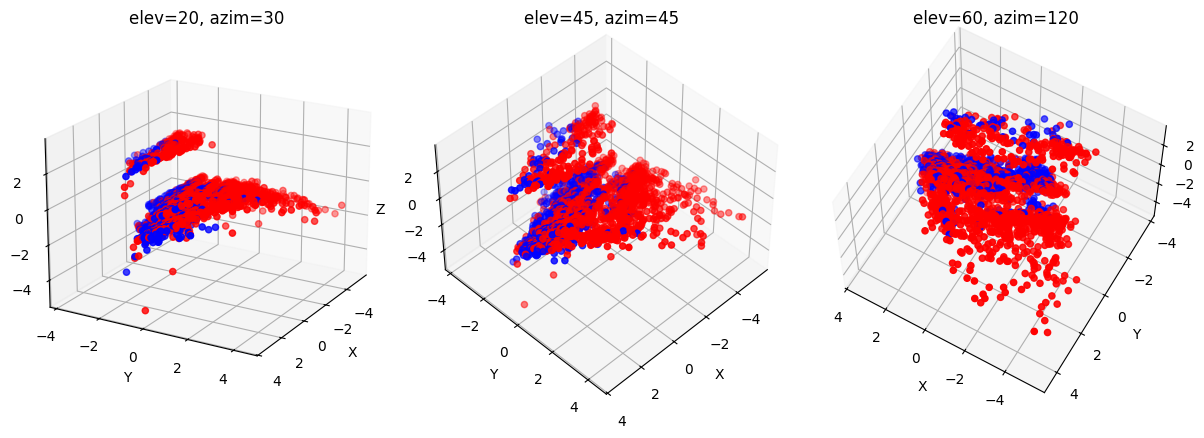

In [359]:
print(f'CITY: {names[0]}')
plot_with_different_angles(X_pca[0], ['red', 'blue'], y[0].astype(int))

CITY: Shenyang


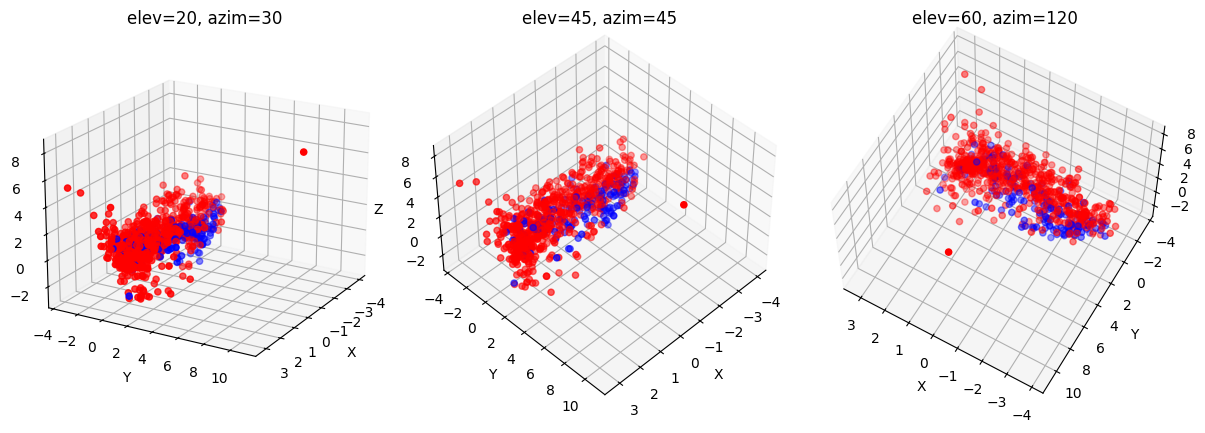

In [360]:
print(f'CITY: {names[1]}')
plot_with_different_angles(X_pca[1], ['red', 'blue'], y[1].astype(int))

CITY: Guangzhou


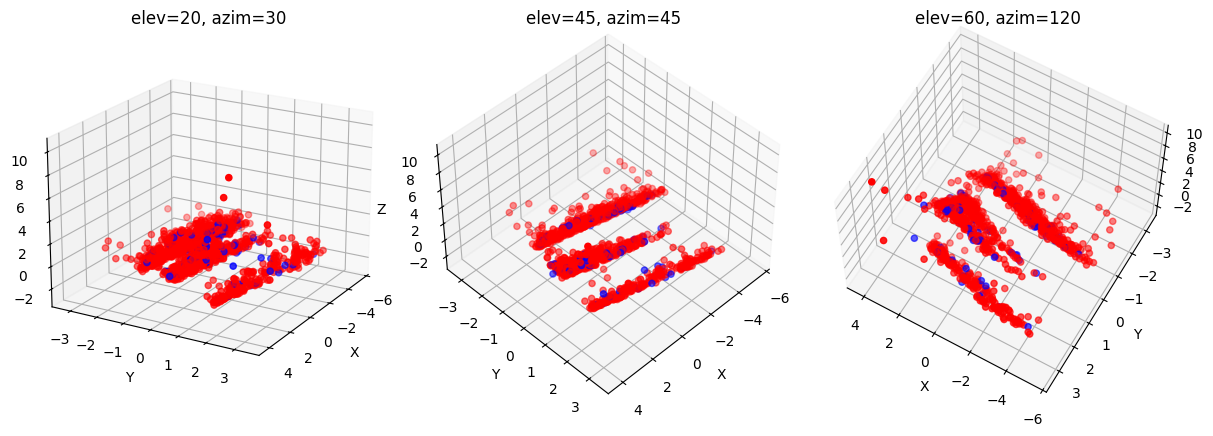

In [361]:
print(f'CITY: {names[2]}')
plot_with_different_angles(X_pca[2], ['red', 'blue'], y[2].astype(int))

CITY: Shanghai


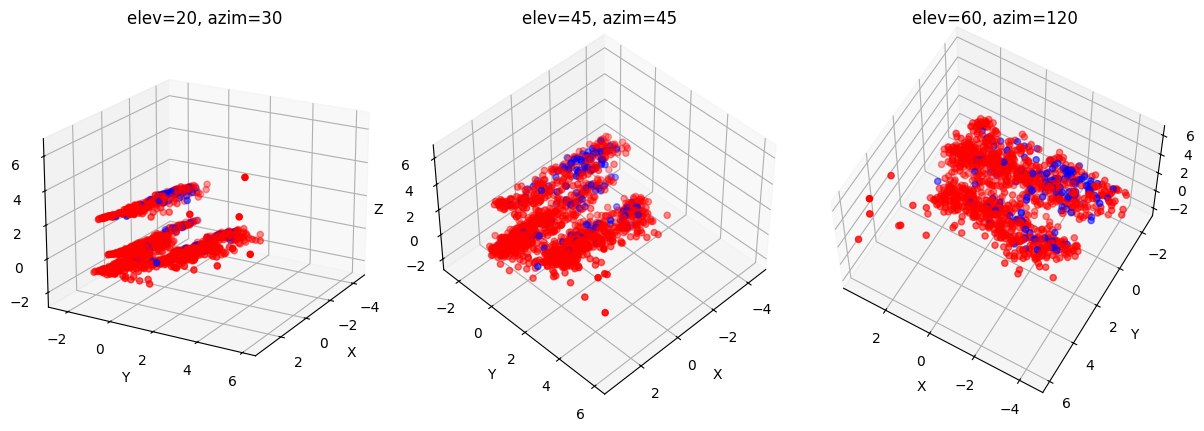

In [362]:
print(f'CITY: {names[3]}')
plot_with_different_angles(X_pca[3], ['red', 'blue'], y[3].astype(int))

As we can see, there are some well defined structures in the data which could be easily clustered together either with a K-Means or maybe with a Mixture of Gaussians model. However, it seems that the well defined clusters don't predict PM levels as we hoped (or at least the first 3 dimensions, which represent roughly 60% of the variance, don't). <br>
Nonetheless, we will try to make predictions with the K-Means predictor.

Another problem that we notice from the plots is that there seem to be many more red points (i.e. label 0) than blue points (i.e. label 1). We can also check this manually:

In [373]:
print(f'# Label 0: {np.bincount(y[np.newaxis, :][0].astype(int))[0]}, # Label 1: {np.bincount(y[np.newaxis, :][0].astype(int))[1]}')

# Label 0: 2099, # Label 1: 796


Considering that after having assigned the clusters we will do majority voting to decide which label to assign to each cluster, having such a big imbalance can lead to issues with the estimation. <br>
We will therefore implement some data augmentation techniques to rebalance the dataset.

## Data Augmentation

## Classification

In this section, we use the Beijing and Shenyang cities to train and validate the model, then we test separately on the Guangzhou and Shanghai data.

In [389]:
from sklearn.model_selection import train_test_split

X_and_y = pd.concat([beijing, shenyang], axis = 0, ignore_index=True).to_numpy()
X, y = X_and_y[:, :10], X_and_y[:, 10].astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

This time, we do not apply PCA nor scaling because we will implement it directly in our class.

In [512]:
class PM_HIGH_PREDICTOR:
    def __init__(self, K):
        self.mean = None
        self.std = None
        self.pca = None
        self.K = K
        self.centroids = None
        self.labels = None
    
    def normalize(self, X, training = False, pca = False):
        
        """
        Inputs:
        - X (numpy array): Array containing the input data.
        """
        
        if training:                                # mean, std and pca values can only be set during training
            self.mean = np.mean(X, axis = 0)        # Mean over the rows of the input array
            self.std = np.std(X, axis = 0)          # STD over the rows of the input array

            X = (X - self.mean)/self.std
        
            if pca:
                self.pca = PCA(n_components=0.90)
                X = self.pca.fit_transform(X)
            return X
        
        else:
            try:
                X = (X - self.mean)/self.std
                if self.pca is not None:
                    X = self.pca.fit_transform(X)
            except:
                raise Exception('')
            return X
        
        
    def fit(self, X_train, y_train, n_iterations = 10, tolerance = 1e-4, verbose=False, pca = True):
        
        """
        Inputs:
        - X (np.array): training data
        - verbose: verbosity parameter (set to True to see distance and # of iterations)
        Outputs:
        - None
        """
        
        if len(X_train.shape) == 1:
            raise Exception('You need at least two vectors to train K-Means')
        
        ### INPUT DATA INITIALIZATION ###
        X = self.normalize(X_train, training=True, pca=pca)                                                           
        
        best_centroids = np.zeros((self.K, X.shape[1]))
        best_inertia = 100000
        best_centroid_assignment = np.zeros(X.shape[1])
        
        for iteration in range(n_iterations):
            
            ### RANDOM CENTROID INITIALIZATION ###
            self.centroids = np.random.normal(loc=0, scale= 1, size = (self.K, X.shape[1]))     
            
            centroid_distance = 100
            n_iterations = 0
            
            
            #### ITERATIVE STEP ####
            while centroid_distance > tolerance:
                
                # Computing distance between each datapoint and each centroid (returns array of shape n_datapoints x n_centroids)
                point_centroid_distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis = 2)
                
                # Assigning each datapoint to closest centroid (returns array of shape n_datapoints x 1, with entries in [0, K])
                centroid_assignment = np.argmin(point_centroid_distances, axis = 1)

                
                new_centroids = []
                for i in range(self.K):
                    if np.bincount(centroid_assignment, minlength=self.K + 1)[i]:
                        
                        # Computing new centroids by doing mean of assigned datapoints
                        new_centroids.append(np.mean(X[centroid_assignment == i], axis = 0))
                    
                    else:
                        new_centroids.append(self.centroids[i])
                
                new_centroids = np.array(new_centroids)
                centroid_distance = np.linalg.norm(self.centroids - new_centroids)
                self.centroids = new_centroids
                n_iterations += 1
                # if verbose:
                #     print(f'ITERATION {n_iterations}. DISTANCE: {centroid_distance}')
                #     print(np.bincount(centroid_assignment))
            
            current_intertia = np.sum(point_centroid_distances[np.arange(point_centroid_distances.shape[0]), centroid_assignment])   
            if verbose:
                print(f'Iteration {iteration}. Inertia: {current_intertia:.2f}')
            if current_intertia < best_inertia:
                best_inertia = current_intertia
                best_centroids = new_centroids
                best_centroid_assignment = centroid_assignment
        
        
        self.centroids = best_centroids
        self.labels = np.zeros(self.K)
        for i in range(self.K):
            if len(np.bincount(y_train[best_centroid_assignment == i].astype(int))):
                self.labels[i] = np.argmax(np.bincount(y_train[best_centroid_assignment == i].astype(int)))
        if verbose:
            print('Training Complete')
            
    def predict(self, X_test):
        if self.centroids is None:
            raise Exception('The model has not been trained')
        
        if len(X_test.shape) == 1:
            X_test = X_test[np.newaxis, :]
        
        X = self.normalize(X_test, training=False)
        
        point_centroid_distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis = 2)
        point_assignment = np.argmin(point_centroid_distances, axis = 1)
        return self.labels[point_assignment]
        
        
    def score(self, X, y):
        y_pred = self.predict(X)
        n_labels = max(int(np.max(self.labels)) + 1, int(np.max(y))+1)
        confusion_matrix = np.zeros((n_labels, n_labels), dtype=int)
        
        # Counting entries of Confusion Matrix
        for true_label, pred_label in zip(y, y_pred):
            confusion_matrix[int(true_label), int(pred_label)] += 1
            
        # Computing accuracy
        accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
        
        return accuracy, confusion_matrix
    
    

In [514]:
k_means_model = PM_HIGH_PREDICTOR(K = 10)
k_means_model.fit(X_train, y_train, 20, 1e-5, True, True)

ITERATION 1. DISTANCE: 7.060054048153808
[195 119 392 495  61 184  73  17 387 393]
ITERATION 2. DISTANCE: 1.6939327072847516
[224 256 402 464  76 161  55  68 281 329]
ITERATION 3. DISTANCE: 1.1339744943060357
[219 321 422 441 102 146  54  91 235 285]
ITERATION 4. DISTANCE: 1.0894003749556267
[203 352 428 409 127 146  56 143 195 257]
ITERATION 5. DISTANCE: 1.2777428050714814
[194 368 402 392 143 141  59 206 137 274]
ITERATION 6. DISTANCE: 0.8341282555537661
[188 381 383 375 147 137  66 234 117 288]
ITERATION 7. DISTANCE: 0.3841639572075813
[192 378 376 363 154 136  72 245 118 282]
ITERATION 8. DISTANCE: 0.3152411745180172
[185 390 372 359 165 136  75 247 118 269]
ITERATION 9. DISTANCE: 0.2829532168372927
[174 407 366 356 171 136  77 253 118 258]
ITERATION 10. DISTANCE: 0.33743025169743324
[167 414 364 356 176 136  76 257 118 252]
ITERATION 11. DISTANCE: 0.3275685859191483
[162 417 363 356 181 136  76 260 118 247]
ITERATION 12. DISTANCE: 0.1575048392154173
[151 421 362 356 187 136  77 26

In [506]:
k_means_model.predict(X_val)[:10]

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0.])

In [509]:
accuracy, cm = k_means_model.score(X_val, y_val)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {cm}')

Accuracy: 0.7132987910189983
Confusion Matrix:
 [[380  40]
 [126  33]]


## Hyperparameter Tuning

In this section, we try different combinations of the hyperparameters to select the best possible model. <br>
The hyperparameters we optimize are:
- Number of Iterations
- Number of Clusters
- PCA vs Not PCA
- Tolerance

In [497]:
n_iterations_options = [5, 10, 20, 50, 75, 100]
n_clusters_options = [2, 5, 7, 10, 15, 20, 25, 50]
PCA_options = [True, False]
tolerance_options = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

In [511]:
import itertools

best_accuracy = 0
best_model = None
optimal_combination = None
for combination in itertools.product(n_iterations_options, n_clusters_options, PCA_options, tolerance_options):
    n_iter, K, pca, tolerance = combination
    kmeans = PM_HIGH_PREDICTOR(K)
    kmeans.fit(X_train, y_train, n_iterations=n_iter, verbose=False, tolerance=tolerance, pca=pca)
    accuracy, _ = kmeans.score(X_val, y_val)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = kmeans
        optimal_combination = combination
    
    

TypeError: PM_HIGH_PREDICTOR.fit() got an unexpected keyword argument 'pca'